<a href="https://colab.research.google.com/github/Fhashemi91/NLP-assignment-1/blob/main/Hashemi_Fatemeh_2058838.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/NLP assignment 2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/NLP assignment 2


In [39]:
import pandas as pd
# import numpy as np
import pickle

import gensim
import re
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import similarities
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import word_tokenize

%pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re
import matplotlib.pyplot as plt

%pip install FuzzyTM
from FuzzyTM import FLSA_W

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
data = pd.read_csv('us_equities_news_dataset .csv')
data_aapl = data[data.title.map(lambda x: 'Apple' in x)]
data_aapl

,id,ticker,title,category,content,release_date,provider,url,article_id
57,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple Leads Tech Rout,news,Investing com A rout in Apple and Facebook NASDAQ FB Monday swept through tech prompting a ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-news/stocks--dow-drops-nearly-400-points-as-apple-le...,1694042
110,221625,UBER,Tempur Sealy Fiat Chrysler Automobiles Spotify Apple And Amazon Highlighted As Zacks Bull And...,opinion,For Immediate ReleaseChicago IL January 9 2020 Shares of Tempur Sealy NYSE TPX as the...,2020-01-08,Zacks Investment Research,https://www.investing.com/analysis/tempur-sealy-fiat-chrysler-automobiles-spotify-apple-and-amaz...,200497620
112,221627,UBER,Apple AAPL Witnesses Strong Momentum In App Store Services,opinion,Apple NASDAQ AAPL recently a year end retrospective of its Services business which include...,2020-01-08,Zacks Investment Research,https://www.investing.com/analysis/apple-aapl-witnesses-strong-momentum-in-app-store-services-20...,200497638
131,221646,UBER,The Zacks Analyst Blog Highlights Amazon Microsoft Apple Netflix And Facebook,opinion,For Immediate ReleaseChicago IL December 30 2019 Zacks com announces the list of stocks fe...,2019-12-29,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-analyst-blog-highlights-amazon-microsoft-apple-netf...,200495447
152,221667,UBER,The Zacks Analyst Blog Highlights Apple Spotify Netflix Disney And Comcast,opinion,For Immediate ReleaseChicago IL December 18 2019 Zacks com announces the list of stocks fe...,2019-12-17,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-analyst-blog-highlights-apple-spotify-netflix-disne...,200493551
...,...,...,...,...,...,...,...,...,...
212376,433892,C,Wednesday s Market Watch Apple Takes It Hard,opinion,President Obama addressed the US people on Tuesday night and confirmed that he was planning to p...,2013-09-11,Benzinga,"https://www.investing.com/analysis/apple-shares-continue-to-slump,-non-violet-action-planned-in-...",183392
214828,436344,VZ,Apple AAPL Music Hires Jeff Bronikowski Amid Streaming War,opinion,Apple NASDAQ AAPL has hired Warner Music Group executive Jeff Bronikowski as the global head...,2020-02-11,Zacks Investment Research,https://www.investing.com/analysis/apple-aapl-music-hires-jeff-bronikowski-amid-streaming-war-20...,200506851
217745,439261,XOM,Four Apple Focused ETFs,opinion,Apple Nasdaq AAPL kicks off another eagerly anticipated Worldwide Developers Conference today...,2012-06-11,Benzinga,https://www.investing.com/analysis/four-apple-focused-etfs-126124,126124
217748,439264,XOM,Why We re Cautious On Apple,opinion,In yesterday s commentary we cited the punk performance of Apple AAPL shares in recent weeks ...,2012-06-20,Rick Ackerman,https://www.investing.com/analysis/why-we’re-cautious-on-apple-127072,127072


In [41]:
messages = data_aapl['title'].tolist()
messages

['Stocks   Dow Drops Nearly 400 Points as Apple Leads Tech Rout',
 'Tempur Sealy  Fiat Chrysler Automobiles  Spotify  Apple And Amazon Highlighted As Zacks Bull And Bear Of The Day',
 'Apple  AAPL  Witnesses Strong Momentum In App Store  Services',
 'The Zacks Analyst Blog Highlights  Amazon  Microsoft  Apple  Netflix And Facebook',
 'The Zacks Analyst Blog Highlights  Apple  Spotify  Netflix  Disney And Comcast',
 'Apple Beats Market In 2019  Can It Maintain Momentum In 2020 ',
 'NVIDIA  Greenbrier  Uber  Amazon And Apple Highlighted As Zacks Bull And Bear Of The Day',
 'The Zacks Analyst Blog Highlights  Apple  Alphabet  Facebook  Uber And Lyft',
 'The Fed s Next Move  Apple   Facebook Earnings   Buy DG Stock   Free Lunch',
 'Dog Days Arrive Late As Lackluster Trading Dominates  But Apple Event On Tap',
 'Can Competitive Pricing Boost Apple s Revenues ',
 'Bonds  Apple Event  Uber And Lyft Bill   Buy Ciena Stock   Free Lunch',
 'The Zacks Analyst Blog Highlights  Alphabet  Facebook  

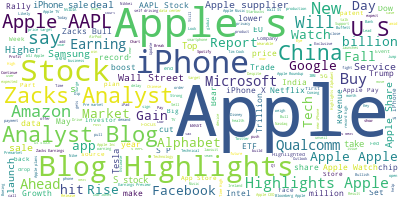

In [42]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_aapl['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [66]:
def preprocess_data(doc_set):

  """
  Input  : Text (docuemnt) list
  Purpose: Preprocess text (tokenize, removing stopwords, and stemming)
  Output : Preprocessed text
  """
  #initialize regex tokenizer
  tokenizer = RegexpTokenizer(r'\w+')

  #create English stop words list
  en_stop = set(stopwords.words('english'))
  

 

  #Create p_stemmer of class PorterStemmer
  p_stemmer = PorterStemmer()

  #list for tokenized documents in loop
  texts = []


  #loop through document list
  for i in doc_set:

    # clean and tokenize document string
    raw = i.lower()    
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
  
  return texts

In [67]:
def prepare_corpus(doc_clean):

  """
  Input  : Preprocessed documents
  Purpose: Create term dictionary from the corpus and convert list of documents (corpus) into document term matrix
  Output : Term dictionary and Document Term Matrix
  """
  # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
  dictionary = corpora.Dictionary(doc_clean)

  # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
  doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
  
  return dictionary,doc_term_matrix

In [68]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):

  """
  Input  : Preprocessed document, number of topics and number of words associated with each topic
  Purpose: Create LSA model using gensim
  Output : Return LSA model
  """
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  
  # generate LSA model
  lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
  print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
  return lsamodel

In [69]:
def create_gensim_lda_model(doc_clean,number_of_topics,words):

  """
  Input  : Preprocessed document, number of topics and number of words associated with each topic
  Purpose: Create LSA model using gensim
  Output : Return LSA model
  """
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  
  # generate LDA model
  ldamodel = LdaModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary,passes =10, update_every = 1, chunksize=10, alpha='auto')  # train model
  print(ldamodel.print_topics(num_topics=number_of_topics, num_words=words))
  return ldamodel

In [70]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3,tm='lda'):

  """
  Input   : dictionary : A Gensim dictionary
            docume : Gensim corpus
            texts : List of input texts
            stop : Max num of topics
  purpose : Compute c_v coherence for various number of topics
  Output  : model_list : List of LSA topic models
            coherence_values : Coherence values corresponding to the LDA model with respective number of topics
  """
  coherence_values = []
  model_list = []

  for topic_num in range(start, stop, step):

    if tm == 'lsa':
      model = LsiModel(doc_term_matrix, num_topics = topic_num, id2word = dictionary)  # train model
    else:
      model = LdaModel(doc_term_matrix, num_topics=topic_num, id2word = dictionary,passes =10, update_every = 1, chunksize=10, alpha='auto')

    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  
  return model_list, coherence_values

In [71]:
clean_text=preprocess_data(messages)

In [49]:
print(clean_text[0])

['stock', 'dow', 'drop', 'nearli', '400', 'point', 'appl', 'lead', 'tech', 'rout']


<h2>Results LSA</h2>

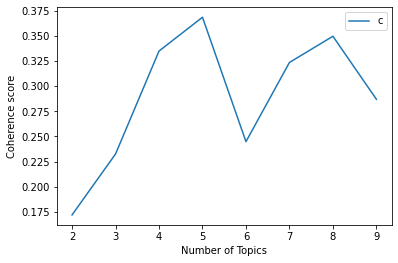

In [17]:
def plot_graph(doc_clean,start, stop, step,t_m = 'lda'):

  dictionary,doc_term_matrix=prepare_corpus(clean_text)
  model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean, stop, start, step, tm = t_m)
  
  # Show graph
  x = range(start, stop, step)
  plt.plot(x, coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')
  plt.show()

start,stop,step=2,10,1
plot_graph(clean_text,start,stop,step,t_m = 'lsa')

In [18]:
# LSA Model

words=10
new_number_of_topics = 4

model=create_gensim_lsa_model(clean_text,new_number_of_topics,words)

[(0, '0.943*"appl" + 0.126*"iphon" + 0.108*"stock" + 0.083*"zack" + 0.078*"highlight" + 0.076*"analyst" + 0.067*"earn" + 0.056*"blog" + 0.050*"amazon" + 0.050*"aapl"'), (1, '0.496*"zack" + 0.485*"highlight" + 0.407*"analyst" + 0.389*"blog" + 0.197*"amazon" + 0.185*"alphabet" + -0.160*"iphon" + 0.125*"facebook" + 0.111*"microsoft" + -0.104*"stock"'), (2, '0.746*"iphon" + -0.537*"stock" + 0.156*"sale" + -0.106*"earn" + -0.090*"market" + 0.087*"x" + 0.086*"china" + -0.073*"fall" + -0.068*"buy" + 0.066*"new"'), (3, '0.714*"stock" + 0.533*"iphon" + -0.193*"appl" + 0.128*"aapl" + 0.116*"sale" + 0.088*"fall" + 0.083*"analyst" + 0.079*"blog" + -0.077*"app" + -0.073*"say"')]


In [19]:
topic_words = model.print_topics(num_topics=new_number_of_topics, num_words=words)

In [20]:
for i,topic in enumerate(topic_words):
  print('Topic ' , i , ':', re.findall(r'"(.*?)"', topic[1]))

Topic  0 : ['appl', 'iphon', 'stock', 'zack', 'highlight', 'analyst', 'earn', 'blog', 'amazon', 'aapl']
Topic  1 : ['zack', 'highlight', 'analyst', 'blog', 'amazon', 'alphabet', 'iphon', 'facebook', 'microsoft', 'stock']
Topic  2 : ['iphon', 'stock', 'sale', 'earn', 'market', 'x', 'china', 'fall', 'buy', 'new']
Topic  3 : ['stock', 'iphon', 'appl', 'aapl', 'sale', 'fall', 'analyst', 'blog', 'app', 'say']


<h2>Results LDA</h2>

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

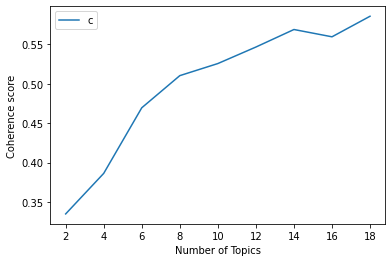

In [72]:
clean_text=preprocess_data(messages)
start,stop,step=2,20,2
plot_graph(clean_text,start,stop,step,t_m = 'lda')

In [ ]:
# LDA Model

words=10
new_number_of_topics = 23

model=create_gensim_lda_model(clean_text,new_number_of_topics,words)
topic_words = model.print_topics(num_topics=new_number_of_topics, num_words=words)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [74]:
for i,topic in enumerate(topic_words):
  print('Topic ' , i , ':', re.findall(r'"(.*?)"', topic[1]))
  # print(type(topic[1]))

Topic  0 : ['mix', 'end', 'p', 'low', 'hold', 'potenti', 'weigh', 'review', 'world', 'toward']
Topic  1 : ['microsoft', 'facebook', 'amazon', 'soar', 'netflix', 'probe', 'wednesday', 'ebay', 'lift', 'one']
Topic  2 : ['fall', 'still', 'downgrad', 'drag', 'big', 'intel', 'larg', 'question', 'health', 'save']
Topic  3 : ['googl', 'etf', 'price', 'inc', 'music', 'fiscal', 'target', 'slightli', 'turn', 'declin']
Topic  4 : ['market', 'beat', 'season', 'flat', 'focus', 'samsung', '14', 'led', 'travel', 'upbeat']
Topic  5 : ['appl', 'report', 'aapl', 'hit', 'wall', 'compani', 'technic', 'store', 'app', 'like']
Topic  6 : ['sell', '15', 'research', 'fear', 'deal', 'battl', 'exclus', 'sourc', 'verdict', 'rotten']
Topic  7 : ['short', 'time', 'top', 'bank', 'begin', 'ge', 'momentum', 'climb', 'closer', 'best']
Topic  8 : ['stock', 'earn', 'us', 'buy', 'break', 'lower', 'nasdaq', 'starbuck', 'eye', 'fed']
Topic  9 : ['take', 'move', 'next', 'chart', 'day', 'profit', 'surg', 'biggest', 'trend', '

<h2>The most dominant topic and its percentage contribution in each document</h2>

In [75]:
def format_topics_sentences(ldamodel, cleaned_text):

  """
  Input   : ldamodel : Gensim generated LDA model
            cleaned_text : preprocessed text
  purpose : Find the most dominant topic in each document and its percentage contribution
  Output  : Dataframe displaying the  most dominant topic in each document and its percentage contribution
  """

  dictionary, docterm_matrix = prepare_corpus(cleaned_text)

  sent_topics_df = pd.DataFrame()

  #Get main topic in each document
  for i, row_list in enumerate(ldamodel[docterm_matrix]):
    row = row_list[0] if ldamodel.per_word_topics else row_list            
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    #Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):

      if j == 0:  # => dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

      else:
        break
  
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  #Add original text to the end of the output
  contents = pd.Series(cleaned_text)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
  return(sent_topics_df)

In [76]:
df_topic_sents_keywords = format_topics_sentences(model, clean_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.1990,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[stock, dow, drop, nearli, 400, point, appl, lead, tech, rout]"
1,1,5.0,0.1938,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[tempur, seali, fiat, chrysler, automobil, spotifi, appl, amazon, highlight, zack, bull, bear, day]"
2,2,5.0,0.2667,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[appl, aapl, wit, strong, momentum, app, store, servic]"
3,3,5.0,0.2007,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[zack, analyst, blog, highlight, amazon, microsoft, appl, netflix, facebook]"
4,4,5.0,0.2017,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[zack, analyst, blog, highlight, appl, spotifi, netflix, disney, comcast]"
5,5,5.0,0.2069,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[appl, beat, market, 2019, maintain, momentum, 2020]"
6,6,5.0,0.2101,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[nvidia, greenbrier, uber, amazon, appl, highlight, zack, bull, bear, day]"
7,7,5.0,0.2127,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[zack, analyst, blog, highlight, appl, alphabet, facebook, uber, lyft]"
8,8,5.0,0.1972,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[fed, next, move, appl, facebook, earn, buy, dg, stock, free, lunch]"
9,9,5.0,0.2001,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[dog, day, arriv, late, lacklust, trade, domin, appl, event, tap]"


<h2>The most representative sentence for each topic</h2>

In [77]:
pd.options.display.max_colwidth = 100

def most_repr_sent_tp(document_dom_topic_df):

  """
  Input   : ldamodel : Dataframe containing the most dominant topic and its contribution per document
  purpose : Find the most representative sentence for each topic
  Output  : Dataframe displaying the most representative sentence for each topic
  """

  sent_topics_sorted_df = pd.DataFrame()

  grouped_document_dom_topic_df = document_dom_topic_df.groupby('Dominant_Topic')

  for i, grp in grouped_document_dom_topic_df:
    sent_topics_sorted_df = pd.concat([sent_topics_sorted_df, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], axis=0)

  sent_topics_sorted_df.reset_index(drop=True, inplace=True)

  sent_topics_sorted_df.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

  return sent_topics_sorted_df

In [78]:
most_repr_sent_tp(df_topic_sents_keywords)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,5.0,0.2675,"appl, report, aapl, hit, wall, compani, technic, store, app, like","[appl, aapl, weed, unwant, app, app, store]"


<h2>Visualize topics using pyLDAvis</h2>

In [82]:
def viz_topics(cleaned_text,topics,words=1000):
  
  dictionary, docterm_matrix = prepare_corpus(cleaned_text)
  
  model=create_gensim_lda_model(cleaned_text,topics,5)

  vis = gensimvis.prepare(model, docterm_matrix, dictionary)

  return vis

In [84]:
vizualization = viz_topics(clean_text,5)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0, '0.074*"u" + 0.044*"googl" + 0.030*"updat" + 0.021*"china" + 0.021*"price"'), (1, '0.380*"appl" + 0.039*"earn" + 0.026*"market" + 0.012*"buy" + 0.011*"trade"'), (2, '0.029*"high" + 0.026*"iphon" + 0.025*"record" + 0.020*"watch" + 0.017*"break"'), (3, '0.110*"stock" + 0.041*"dow" + 0.035*"futur" + 0.028*"us" + 0.028*"0"'), (4, '0.053*"analyst" + 0.040*"zack" + 0.039*"highlight" + 0.036*"microsoft" + 0.033*"blog"')]


In [85]:
pyLDAvis.display(vizualization)

##FuzzyTM

In [91]:
#Initialize model
flsaW = FLSA_W(
    input_file=clean_text,
    num_topics= 8,
    num_words = 10,
    word_weighting ='normal',
    cluster_method = 'fcm',
    )

#Train topic model and obtain to matrices
pwgt, ptgd = flsaW.get_matrices()

#Get topics
topics = flsaW.show_topics(representation='words')

print(topics)

[['appl', 'del', 'bancorp', 'squibb', 'mont', 'virginia', 'bristol', 'myer', 'reit', 'zack'], ['appl', 'consolid', 'oversold', 'rotten', 'breakdown', 'far', 'cautiou', 'hot', 'zack', 'complet'], ['ahead', 'appl', 'trade', 'high', '3', 'street', 'deal', 'buy', 'record', 'rise'], ['appl', 'featur', 'hold', 'com', 'post', 'zack', 'highlight', 'nation', 'hospit', 'analyst'], ['appl', 'analysi', 'bottom', 'bounc', 'breakout', 'bearish', 'crush', 'resist', 'thing', 'readi'], ['appl', 'technic', 'short', 'support', 'bullish', 'wwdc', 'confirm', 'option', 'turn', 'rebound'], ['appl', 'q4', 'releas', 'q1', 'updat', 'event', 'focu', 'sell', 'hire', 'surg'], ['appl', 'stock', 'earn', 'iphon', 'facebook', 'amazon', 'alphabet', 'day', 'microsoft', 'u']]


In [92]:
for id, tp in enumerate(topics):
  print('Topic ' , id, ':', tp)

Topic  0 : ['appl', 'del', 'bancorp', 'squibb', 'mont', 'virginia', 'bristol', 'myer', 'reit', 'zack']
Topic  1 : ['appl', 'consolid', 'oversold', 'rotten', 'breakdown', 'far', 'cautiou', 'hot', 'zack', 'complet']
Topic  2 : ['ahead', 'appl', 'trade', 'high', '3', 'street', 'deal', 'buy', 'record', 'rise']
Topic  3 : ['appl', 'featur', 'hold', 'com', 'post', 'zack', 'highlight', 'nation', 'hospit', 'analyst']
Topic  4 : ['appl', 'analysi', 'bottom', 'bounc', 'breakout', 'bearish', 'crush', 'resist', 'thing', 'readi']
Topic  5 : ['appl', 'technic', 'short', 'support', 'bullish', 'wwdc', 'confirm', 'option', 'turn', 'rebound']
Topic  6 : ['appl', 'q4', 'releas', 'q1', 'updat', 'event', 'focu', 'sell', 'hire', 'surg']
Topic  7 : ['appl', 'stock', 'earn', 'iphon', 'facebook', 'amazon', 'alphabet', 'day', 'microsoft', 'u']


##Evaluation

In [93]:
#Evaluation
coherence = flsaW.get_coherence_score(
    input_file = clean_text,
    topics=topics
    )

diversity = flsaW.get_diversity_score(
    topics=topics
    )

interpretability = flsaW.get_interpretability_score(
    input_file=clean_text,
    topics=topics,
    )
topics
print('Coherence score: ',
      str(coherence),
      'Diversity score:',
      str(diversity),
      'Interpretability score: ',
      str(interpretability),
      sep = '\n'
      )

Coherence score: 
0.5002351247069516
Diversity score:
0.8875
Interpretability score: 
0.44395867317741955
